### Carga de paquetes

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt #Para graficar
from skimage.io import imshow #Para graficar las imagenes
import tensorflow as tf
import os
import glob
import cv2
import matplotlib.pyplot as plt
from Funciones import Leer_fotos


In [3]:
root_path = "../"

directorio_origen = root_path + "Nuestras Caras"

destino = root_path + "Caras_cortadas" #carpeta donde se guardaran las imagenes de caras cortadas

In [4]:

from Funciones import  nombres
names = nombres(directorio_origen)
names

['Abel',
 'Carlos',
 'Federico G',
 'Federico R',
 'Florencia',
 'Franco A',
 'Franco S',
 'Gerard',
 'Gustavo',
 'Joaquin',
 'Juan',
 'Lautaro',
 'Lisandro',
 'Marco',
 'Matias',
 'Natalia',
 'Noelia',
 'Paola',
 'Victorio']

Convertimos los archivos formatio hiec a jpg

Funcion que lee las fotos y si encuentra fotos formato hiec las convierte a jpg

In [5]:
from Funciones import  Leer_fotos
fotos=Leer_fotos(directorio_origen)

La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
La conversión fue exitosa.
L

In [6]:
# Mostrar información
nombres_personas = list(fotos.keys())
print("Cantidad de personas:", len(nombres_personas))
print("Cantidad de fotos por persona:")
for nombre_persona, fotos_persona in fotos.items():
    print(f"- {nombre_persona}: {len(fotos_persona)}")



Cantidad de personas: 19
Cantidad de fotos por persona:
- Abel: 17
- Carlos: 19
- Federico G: 20
- Federico R: 22
- Florencia: 15
- Franco A: 25
- Franco S: 12
- Gerard: 14
- Gustavo: 15
- Joaquin: 17
- Juan: 18
- Lautaro: 23
- Lisandro: 21
- Marco: 14
- Matias: 18
- Natalia: 16
- Noelia: 14
- Paola: 21
- Victorio: 16


## funcion para imprimir fotos de una persona

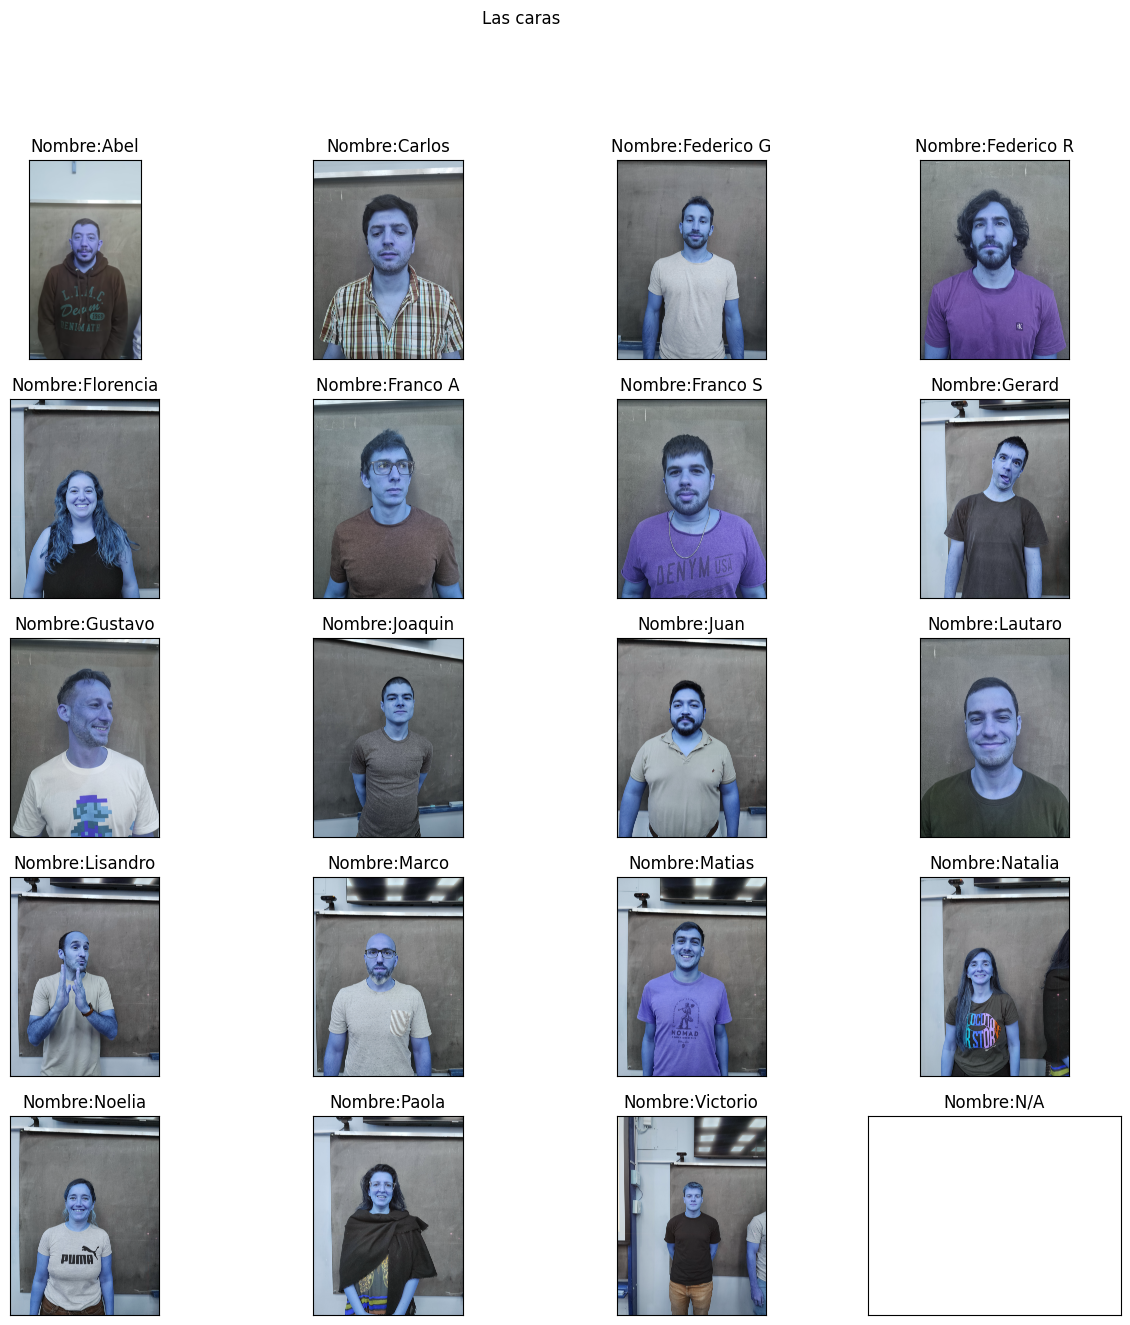

In [7]:

from Funciones import show_people
show_people(fotos)

## Funcion para imprimir X cantidad de fotos por persona

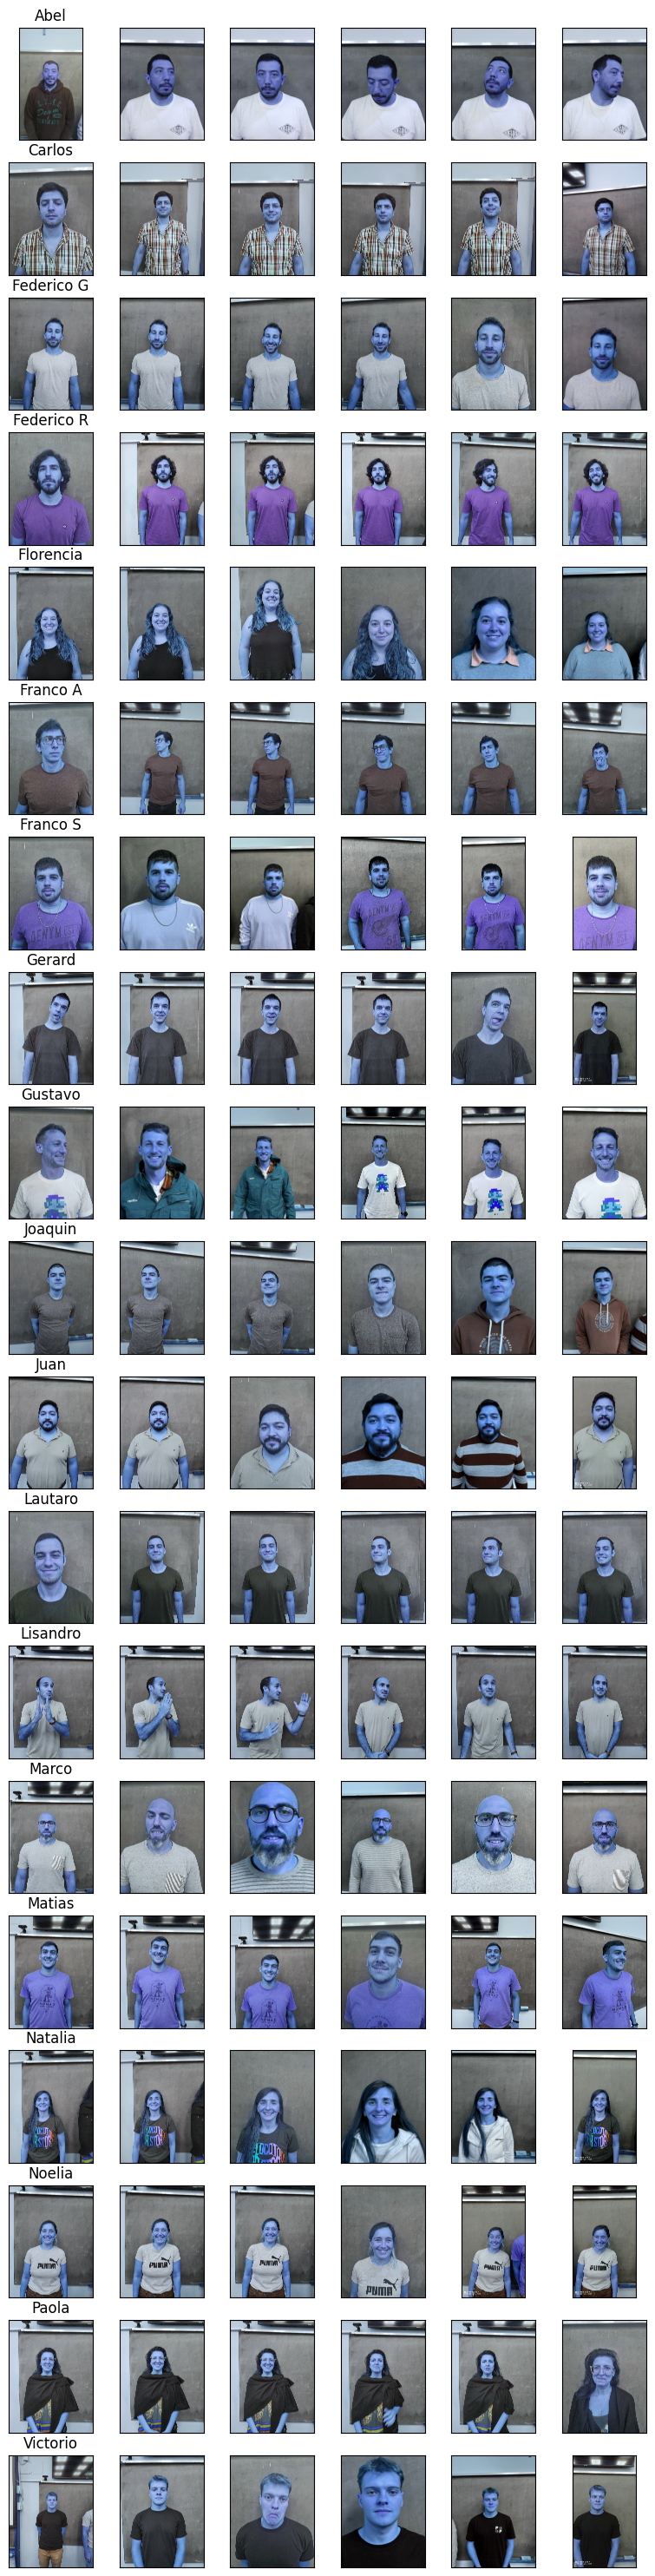

In [8]:
from Funciones import show_people_agg_cant
show_people_agg_cant(fotos,6)

## Funcion para recortar imagenes

## Recortar imagen

In [9]:
import os
import cv2
import matplotlib.pyplot as plt

def recortar_imagen(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Utilizar un clasificador específico para caras
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt.xml")

    # Detectar rostros en la imagen
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=3, minSize=(30, 30))

    # Recorrer las caras detectadas
    face_images = []
    for (x, y, w, h) in faces:
        # Recortar la cara de la imagen
        face_images.append(image[y:y+h, x:x+w])

    return face_images

## Procesar Carpetas

In [11]:
def procesar_carpetas(directorio_origen, directorio_destino):
    # Iterar sobre las carpetas dentro del directorio

    # Crea el directorio si no existe
    if not os.path.exists(directorio_destino):
       os.makedirs(directorio_destino)

    for root, dirs, files in os.walk(directorio_origen):
        for dir_name in dirs:
            print("Carpeta:", dir_name)
            dir_path = os.path.join(root, dir_name) #directorio origen de la persona 
            dir_path_recorte = os.path.join(directorio_destino, dir_name) #directorio destino de la persona
            
            if not os.path.exists(dir_path_recorte):
                os.makedirs(dir_path_recorte) #creamos carpetas para cada nombre
            
            images = []

            numero=0 #numero de la foto dentro del directorio
            
            for file in glob.glob(os.path.join(dir_path, "*.jpg")) :
                # Verificar si el archivo es una imagen
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    # Leer la imagen
                    #mage_path = os.path.join(dir_path, file)
                    image_path = file
                    print(image_path)
                    image = cv2.imread(image_path)
                    
                    if image is not None:
                        # Recortar la imagen
                        numero +=1
                        face_images = recortar_imagen(image)
                        images.extend(face_images)
                        numero_interno=0
                        for face_image in face_images:
                            gray_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
                            numero_interno +=1
                            numero_formateado = str(numero).zfill(2)
                            numero_interno_formateado = str(numero_interno).zfill(2)
                            #_{image_path.split('.')[0]}_
                            output_path = os.path.join(dir_path_recorte , f"{dir_name}_{numero_formateado}_{numero_interno_formateado}.jpg")
                            # Save the cropped face to the output directory                       
                            cv2.imwrite(output_path, gray_image)



            # Mostrar las imágenes de la carpeta en una matri         mostrar_matriz_de_imagenes(images)



Carpeta: Abel
../Nuestras Caras\Abel\IMG-0.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0007.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0009.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0010.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0011.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0012.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0013.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0014.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0015.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0016.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0017.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0018.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0019.jpg
../Nuestras Caras\Abel\IMG-20240406-WA0020.jpg
../Nuestras Caras\Abel\IMG-20240518-WA0016.jpg
../Nuestras Caras\Abel\IMG-20240518-WA0026.jpg
../Nuestras Caras\Abel\IMG_3675.jpg
Carpeta: Carlos
../Nuestras Caras\Carlos\20240309_112324.jpg
../Nuestras Caras\Carlos\20240309_112543.jpg
../Nuestras Caras\Carlos\20240309_112544.jpg
../Nuestras Caras\Carlos\20240309_112548.jpg
../Nuestras Cara

In [ ]:
procesar_carpetas(directorio_origen, destino)

In [ ]:
    """
    fotos a borrar si las genera siempre con el mismo nombre
    Carlos_04_02.jpg
    Carlos_05_01.jpg
    Carlos_10_02.jpg
    Carlos_13_01.jpg
    Carlos_14_02.jpg
    Carlos_15_02.jpg
    
    Federico G_18_02.jpg
    
    Federico R_20_02.jpg
    
    Franco A_23_02.jpg
    Franco A_23_03.jpg
    
    Juan_07_02.jpg
    
    Lisandro_01_02.jpg
    Lisandro_03_01.jpg
    Lisandro_11_02.jpg
    
    Marco_06_02.jpg
    
    Matias_03_02.jpg
    
    Natalia_07_02.jpg
    
    Noelia_10_01.jpg
    
    Paola_19_02.jpg
    
    Victorio_02_01.jpg
    
    
    """